<a href="https://colab.research.google.com/github/onlyreynaldo/python-clustering-data/blob/main/PredictionModel_ML26_Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_abt = pd.read_csv('/content/drive/MyDrive/datasets/olist/abt_classificacao_churn_train.csv')
df_abt.head()

,data_ref,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [ ]:
df_abt.shape

(1690, 9)

# Train Test Split

In [ ]:
key_vars = ['data_ref','seller_id']
cat_vars = ['uf']
num_vars = ['tot_orders_12m','tot_items_12m','tot_items_dist_12m','receita_12m','recencia']
features = cat_vars + num_vars
target = 'churn_6m'

# seleciona as colunas com as features
X = df_abt[features].copy()
# seleciona o target
y = df_abt[target].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)

# Feature Engineering

In [ ]:
!pip install feature-engine

     |████████████████████████████████| 9.5MB 6.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.missing_data_imputers import ArbitraryNumberImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from feature_engine.missing_data_imputers import CategoricalVariableImputer
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [ ]:
data_pipe = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
    ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotCategoricalEncoder(variables=cat_vars))
])

In [ ]:
X_train.head()

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
428,SP,2,2,1,109.80,4
12,GO,8,8,2,1105.96,74
387,SP,277,331,98,21932.61,4
1617,SP,16,16,12,1990.79,25
887,SP,20,22,12,2018.26,0


In [ ]:
data_pipe.fit_transform(X_train).head()

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_SP,uf_GO,uf_PR,uf_MG,uf_RJ,uf_BA,uf_SC,uf_PB,uf_RS,uf_MS,uf_DF,uf_MT,uf_CE,uf_PE,uf_SE,uf_PA,uf_ES,uf_AM,uf_RN,uf_RO
428,-0.345054,-0.344061,-0.431087,-0.346404,-0.741236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,-0.257630,-0.268243,-0.385613,-0.244749,0.008036,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
387,3.661917,3.813306,3.979806,1.880539,-0.741236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1617,-0.141063,-0.167152,0.069118,-0.154455,-0.516455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,-0.082780,-0.091333,0.069118,-0.151652,-0.784052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_pipe.transform(X_test)

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_SP,uf_GO,uf_PR,uf_MG,uf_RJ,uf_BA,uf_SC,uf_PB,uf_RS,uf_MS,uf_DF,uf_MT,uf_CE,uf_PE,uf_SE,uf_PA,uf_ES,uf_AM,uf_RN,uf_RO
224,-0.345054,-0.306152,-0.385613,-0.330197,-0.473639,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1546,-0.359625,-0.356697,-0.431087,-0.349955,-0.280969,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1262,-0.359625,-0.344061,-0.385613,-0.355588,0.628861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1603,-0.359625,-0.356697,-0.431087,-0.351904,-0.741236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1157,-0.301342,-0.217697,-0.340140,-0.314361,-0.120411,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,-0.345054,-0.331424,-0.385613,-0.335179,-0.784052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
982,-0.315913,-0.318788,-0.385613,-0.276288,-0.751940,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
765,0.121211,0.161394,0.114591,-0.229742,0.318449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491,-0.053638,-0.091333,-0.158248,-0.020141,-0.398712,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Treinando o Modelo

model_pipe = data_pipe + algoritmo

In [ ]:
from sklearn.linear_model import LogisticRegression

model_pipe = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
    ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotCategoricalEncoder(variables=cat_vars)),
    ('model', LogisticRegression(random_state=2020))
])

In [ ]:
model_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        imputer_dict=None,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('numeric_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(copy=True,
                                                                      with_mean=True,
                                                                      with_std=True),
                                           variables=['tot_orders_12m',
                                                      'tot_ite...
                ('one_hot_encoder',
                

In [ ]:
y_pred_train = model_pipe.predict(X_train)
y_pred_test  = model_pipe.predict(X_test)

In [ ]:
(
    X_train
    .assign(label = model_pipe.predict(X_train))
    .assign(score = model_pipe.predict_proba(X_train)[:,1])
    .assign(new_label = np.where(model_pipe.predict_proba(X_train)[:,1] > 0.3, 1, 0))
).head()

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,label,score,new_label
428,SP,2,2,1,109.80,4,0,0.201655,0
12,GO,8,8,2,1105.96,74,0,0.357481,1
387,SP,277,331,98,21932.61,4,0,0.000381,0
1617,SP,16,16,12,1990.79,25,0,0.189691,0
887,SP,20,22,12,2018.26,0,0,0.113137,0


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# model_pipe.predict() é igual ao
# model_pipe.predict_proba()[:,1] com um ponto de corte igual a 0.5

accuracy_score(model_pipe.predict(X_train), np.where(model_pipe.predict_proba(X_train)[:,1] > 0.5, 1, 0))

1.0

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, model_pipe.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, model_pipe.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, model_pipe.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, model_pipe.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, model_pipe.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, model_pipe.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, model_pipe.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, model_pipe.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, model_pipe.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, model_pipe.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, model_pipe.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, model_pipe.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8298816568047337
Acurácia (Teste): 0.7928994082840237
Acurácia Balanceada (Treino): 0.795083514532018
Acurácia Balanceada (Teste): 0.7620255998805836
Precision (Treino): 0.8604651162790697
Precision (Teste): 0.7714285714285715
Recall (Treino): 0.6542239685658153
Recall (Teste): 0.6377952755905512
F1-Score (Treino): 0.7433035714285714
F1-Score (Teste): 0.6982758620689654
ROCAUC (Treino): 0.9033925520931653
ROCAUC (Teste): 0.8644997574355338


In [ ]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, model_pipe.predict(X_train)), accuracy_score(y_test, model_pipe.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, model_pipe.predict(X_train)), balanced_accuracy_score(y_test, model_pipe.predict(X_test))],
    'precision': [precision_score(y_train, model_pipe.predict(X_train)), precision_score(y_test, model_pipe.predict(X_test))],
    'recall': [recall_score(y_train, model_pipe.predict(X_train)), recall_score(y_test, model_pipe.predict(X_test))],
    'f1_score': [f1_score(y_train, model_pipe.predict(X_train)), f1_score(y_test, model_pipe.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, model_pipe.predict_proba(X_train)[:,1]), roc_auc_score(y_test, model_pipe.predict_proba(X_test)[:,1])]
}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.829882,0.795084,0.860465,0.654224,0.743304,0.903393
1,Logistic Regression,teste,0.792899,0.762026,0.771429,0.637795,0.698276,0.864500


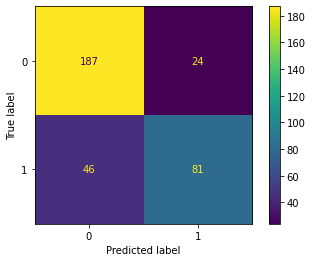

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_pipe, X_test, y_test, values_format='d')

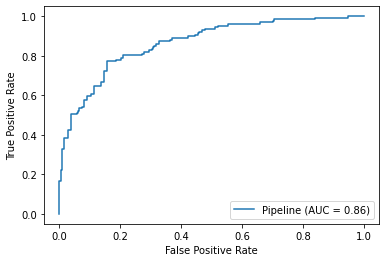

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_pipe, X_test, y_test);

**[Responda]** Calcule todas as métricas acima na base out of Time `abt_classificacao_churn_oot.csv`

**[Responda]** Execute uma árvore de decisão ao invés de uma regressão logística na base. Obs: algoritmos baseados em árvores não precisam de feature scaling! Pode também reutilizar os códigos acima!